# Basic Recommender System with Python

In this section, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

## Methods Used

Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**. 

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items. 
* Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.


## Required Python libraries


* **Pandas**: an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. [https://pandas.pydata.org/ ]
* **Seaborn**- a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [https://seaborn.pydata.org/ ]


## What is Pandas?

Pandas is by far my favorite preprocessing tool. It's a data wrangling/modeling/analysis tool that is similar to R and Excel; in fact, the DataFrame data structure in Pandas was named after the DataFrame in R. 

## Why Pandas?

So, why would you want to use Python, as opposed to tools like R and Excel? I like to use it because I like to keep everything in Python, from start to finish. It just makes it easier if I don't have to switch back and forth between other tools. Also, if I have to build in preprocessing as part of a production system, which I've had to do at my job, it makes sense to just do it in Python from the beginning. 

Pandas is great for preprocessing, as we'll see, and it can be easily combined with other modules from the scientific Python stack.

Let's get started!

## Import Libraries
We would be using aliases for these libraries for brevity. Take note of the **`pd`** alias of Pandas

In [1]:
import numpy as np
import pandas as pd

## The DataFrame

The **`DataFrame`** is Pandas' most used data structure. It's a two and greater dimensional structure that can also hold a variety of mixed data types. It's similar to a spreadsheet in Excel or a SQL table.

## Loading the datasets
The sample datasets is on the **`datasets`** directory of this repository

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('datasets/u.data', sep='\t', names=column_names)

To display the contents of the dataframe use the **`head()`** and **`tail()`** function of Pandas. This will display the first and last 5 rows of the dataframe, respectively.

In [3]:
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [4]:
df.tail()

user_id  item_id  rating  timestamp
99998       880      476       3  880175444
99999       716      204       5  879795543
100000      276     1090       1  874795795
100001       13      225       2  882399156
100002       12      203       3  879959583

To load and display the `Movie_Id_Titles` dataset enter:

In [5]:
movie_titles = pd.read_csv("datasets/Movie_Id_Titles")
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

Next we merge the `df` and `movie_titles` dataframes using the `item_id` column of `movie_titles` as foreign key

In [6]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

# Exploratory Data Analysis
**Exploratory Data Analysis** refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
sns.set_palette("colorblind")

Let's create a ratings dataframe with average rating and number of ratings:

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

Now set the number of ratings column:

In [12]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

Now a few histograms:

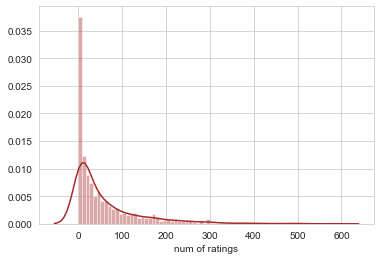

In [13]:
sns.distplot(ratings['num of ratings'], bins=70, color='brown')

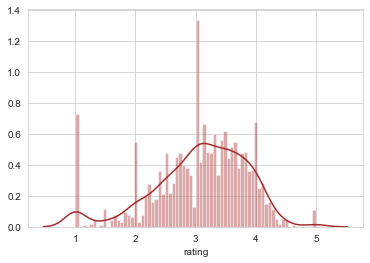

In [14]:
sns.distplot(ratings['rating'], bins=70, color='brown')

Now let us explore the relationship between average **``rating``** and **``num of ratings``**

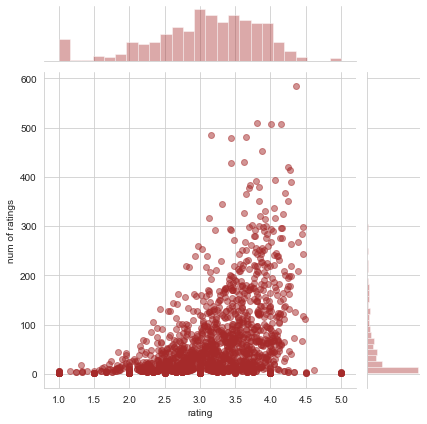

In [15]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5, color='brown')

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [16]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
0        ...                 NaN                       NaN   
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
0                        NaN                        NaN                NaN   
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
0                            NaN      NaN                                 NaN  
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                    

Most rated movie:

In [17]:
ratings.sort_values('num of ratings',ascending=False).head(10)

rating  num of ratings
title                                                  
Star Wars (1977)               4.359589             584
Contact (1997)                 3.803536             509
Fargo (1996)                   4.155512             508
Return of the Jedi (1983)      4.007890             507
Liar Liar (1997)               3.156701             485
English Patient, The (1996)    3.656965             481
Scream (1996)                  3.441423             478
Toy Story (1995)               3.878319             452
Air Force One (1997)           3.631090             431
Independence Day (ID4) (1996)  3.438228             429

Let's choose two movies: **Titanic**, a romantic tragedy. And **Terminator 2**, a scifi movie.

In [18]:
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

Now let's grab the user ratings for those two movies:

In [19]:
titanic_user_ratings = moviemat['Titanic (1997)']
terminator_user_ratings = moviemat['Terminator 2: Judgment Day (1991)']
titanic_user_ratings.head()

user_id
0    NaN
1    NaN
2    5.0
3    NaN
4    NaN
Name: Titanic (1997), dtype: float64

We can then use **`corrwith()`** method to get correlations between two pandas series:

In [20]:
similar_to_titanic = moviemat.corrwith(titanic_user_ratings)
similar_to_terminator = moviemat.corrwith(terminator_user_ratings)

/Users/alimjap/miniconda3/envs/datascience-ustp/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/alimjap/miniconda3/envs/datascience-ustp/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [21]:
similar_to_titanic.head()

title
'Til There Was You (1997)   -0.062017
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.120113
12 Angry Men (1957)          0.077700
187 (1997)                   0.315654
dtype: float64

In [22]:
similar_to_terminator.head()

title
'Til There Was You (1997)         NaN
1-900 (1994)                 1.000000
101 Dalmatians (1996)        0.280081
12 Angry Men (1957)          0.086985
187 (1997)                   0.494658
dtype: float64

Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [23]:
corr_titanic = pd.DataFrame(similar_to_titanic,columns=['Correlation'])
corr_titanic.dropna(inplace=True)
corr_titanic.head()

Correlation
title                                   
'Til There Was You (1997)      -0.062017
101 Dalmatians (1996)           0.120113
12 Angry Men (1957)             0.077700
187 (1997)                      0.315654
2 Days in the Valley (1996)     0.017295

Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched Titanic (it was the most popular movie). 

In [24]:
corr_titanic.sort_values('Correlation',ascending=False).head(10)

Correlation
title                                                
Newton Boys, The (1998)                           1.0
Pest, The (1997)                                  1.0
Amazing Panda Adventure, The (1995)               1.0
Savage Nights (Nuits fauves, Les) (1992)          1.0
Hideaway (1995)                                   1.0
For Ever Mozart (1996)                            1.0
Jerky Boys, The (1994)                            1.0
Nadja (1994)                                      1.0
Hearts and Minds (1996)                           1.0
Secret Agent, The (1996)                          1.0

Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [25]:
corr_titanic = corr_titanic.join(ratings['num of ratings'])
corr_titanic.head()

Correlation  num of ratings
title                                                   
'Til There Was You (1997)      -0.062017               9
101 Dalmatians (1996)           0.120113             109
12 Angry Men (1957)             0.077700             125
187 (1997)                      0.315654              41
2 Days in the Valley (1996)     0.017295              93

Now sort the values and notice how the titles make a lot more sense:

In [26]:
corr_titanic[corr_titanic['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

Correlation  num of ratings
title                                                                     
Titanic (1997)                                    1.000000             350
River Wild, The (1994)                            0.497600             146
Abyss, The (1989)                                 0.472103             151
Bram Stoker's Dracula (1992)                      0.443560             120
True Lies (1994)                                  0.435104             208
William Shakespeare's Romeo and Juliet (1996)     0.430243             106
Last of the Mohicans, The (1992)                  0.427239             128
Outbreak (1995)                                   0.426237             104
Die Hard (1988)                                   0.403124             243
Frighteners, The (1996)                           0.398516             115

Now the same for the sci-fi **Terminator 2**:

In [27]:
corr_terminator = pd.DataFrame(similar_to_terminator,columns=['Correlation'])
corr_terminator.dropna(inplace=True)
corr_terminator = corr_terminator.join(ratings['num of ratings'])
corr_terminator[corr_terminator['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

Correlation  num of ratings
title                                                                     
Terminator 2: Judgment Day (1991)                 1.000000             295
Terminator, The (1984)                            0.562853             301
Craft, The (1996)                                 0.544407             104
Firm, The (1993)                                  0.532058             151
True Lies (1994)                                  0.516728             208
Frighteners, The (1996)                           0.483189             115
Back to the Future (1985)                         0.480123             350
Speed (1994)                                      0.449709             230
William Shakespeare's Romeo and Juliet (1996)     0.444801             106
Mask, The (1994)                                  0.431625             129

# Question and Answers